# Importing required libraries



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data


In [3]:
#taking the data from the dataset folder
df = pd.read_csv("../dataset/fraud.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498121 entries, 0 to 498120
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   trustLevel                 498121 non-null  int64  
 1   totalScanTimeInSeconds     498121 non-null  int64  
 2   grandTotal                 498121 non-null  float64
 3   lineItemVoids              498121 non-null  int64  
 4   scansWithoutRegistration   498121 non-null  int64  
 5   quantityModifications      498121 non-null  int64  
 6   scannedLineItemsPerSecond  498121 non-null  float64
 7   valuePerSecond             498121 non-null  float64
 8   lineItemVoidsPerPosition   498121 non-null  float64
 9   fraud                      498121 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 38.0 MB


# Initial Data Analysis


In [4]:
# first 5 rows of the dataset
df.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,4,467,88.48,4,8,4,0.014989,0.189465,0.571429,0
1,3,1004,58.99,7,6,1,0.026892,0.058755,0.259259,0
2,1,162,14.00,4,5,4,0.006173,0.086420,4.000000,0
3,5,532,84.79,9,3,4,0.026316,0.159380,0.642857,0
4,5,890,42.16,4,0,0,0.021348,0.047371,0.210526,0


In [5]:
# checking for null values
df.isnull().sum()
#data looks quite clean for the initial analysis

trustLevel                   0
totalScanTimeInSeconds       0
grandTotal                   0
lineItemVoids                0
scansWithoutRegistration     0
quantityModifications        0
scannedLineItemsPerSecond    0
valuePerSecond               0
lineItemVoidsPerPosition     0
fraud                        0
dtype: int64

In [6]:
#Checking if rows exists where cells are NaN
df[df.isnull().any(axis=1)]


,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud


In [7]:
# checking for the unique values in the dataset
df.nunique()

trustLevel                        6
totalScanTimeInSeconds         1831
grandTotal                    10000
lineItemVoids                    12
scansWithoutRegistration         11
quantityModifications             6
scannedLineItemsPerSecond     33663
valuePerSecond               407021
lineItemVoidsPerPosition        216
fraud                             2
dtype: int64

In [8]:
# checking for the distribution of the target variable
df['fraud'].value_counts()

fraud
0    474394
1     23727
Name: count, dtype: int64

In [9]:
#Statistical summary of the dataset
df.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
count,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000
mean,3.503257,915.608772,49.988990,5.495926,5.001281,2.499015,0.068054,0.222182,0.735189,0.047633
std,1.707662,528.772880,28.873426,3.447683,3.163795,1.708182,0.521092,1.717867,1.320235,0.212989
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000546,0.000000,0.000000,0.000000
25%,2.000000,458.000000,24.930000,3.000000,2.000000,1.000000,0.008682,0.027348,0.160000,0.000000
50%,4.000000,916.000000,50.030000,5.000000,5.000000,2.000000,0.016940,0.054550,0.352941,0.000000
75%,5.000000,1374.000000,75.020000,8.000000,8.000000,4.000000,0.033929,0.109091,0.692308,0.000000
max,6.000000,1831.000000,99.990000,11.000000,10.000000,5.000000,30.000000,99.710000,11.000000,1.000000


In [10]:
# checking for the correlation between the variables
df.corr()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
trustLevel,1.000000,0.000065,-0.000718,-0.000436,0.000518,-0.000806,-0.000567,0.000391,0.000469,-0.299178
totalScanTimeInSeconds,0.000065,1.000000,-0.001570,-0.000619,-0.000886,-0.000602,-0.169937,-0.168923,-0.000038,0.101605
grandTotal,-0.000718,-0.001570,1.000000,0.000872,0.001876,0.000314,0.000578,0.075609,-0.000773,0.007380
lineItemVoids,-0.000436,-0.000619,0.000872,1.000000,0.001962,-0.000974,-0.001085,-0.000131,0.348968,0.069627
scansWithoutRegistration,0.000518,-0.000886,0.001876,0.001962,1.000000,0.000079,-0.002141,-0.003911,0.000252,0.080411
quantityModifications,-0.000806,-0.000602,0.000314,-0.000974,0.000079,1.000000,-0.003039,-0.002115,0.002425,-0.000437
scannedLineItemsPerSecond,-0.000567,-0.169937,0.000578,-0.001085,-0.002141,-0.003039,1.000000,0.746334,-0.037303,-0.012009
valuePerSecond,0.000391,-0.168923,0.075609,-0.000131,-0.003911,-0.002115,0.746334,1.000000,0.002359,-0.019326
lineItemVoidsPerPosition,0.000469,-0.000038,-0.000773,0.348968,0.000252,0.002425,-0.037303,0.002359,1.000000,-0.081520
fraud,-0.299178,0.101605,0.007380,0.069627,0.080411,-0.000437,-0.012009,-0.019326,-0.081520,1.000000


In [11]:
#checking for relationship with the targert variable 'fraud'
df.corr()['fraud'].sort_values(ascending=False)

fraud                        1.000000
totalScanTimeInSeconds       0.101605
scansWithoutRegistration     0.080411
lineItemVoids                0.069627
grandTotal                   0.007380
quantityModifications       -0.000437
scannedLineItemsPerSecond   -0.012009
valuePerSecond              -0.019326
lineItemVoidsPerPosition    -0.081520
trustLevel                  -0.299178
Name: fraud, dtype: float64

# Exploratory Data Analysis


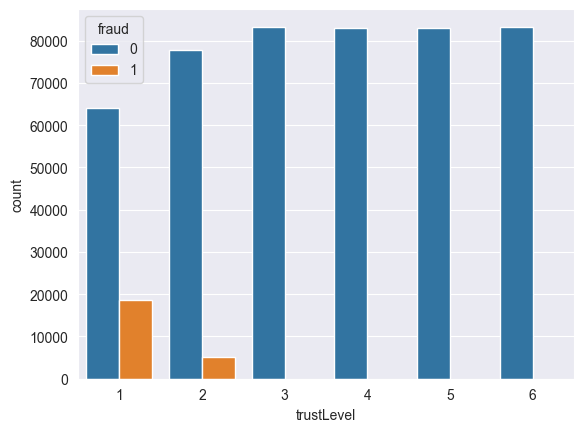

In [12]:
# checking for relationship between 'fraud' and 'trustLevel'
sns.countplot(x='trustLevel', hue='fraud', data=df)
plt.show()


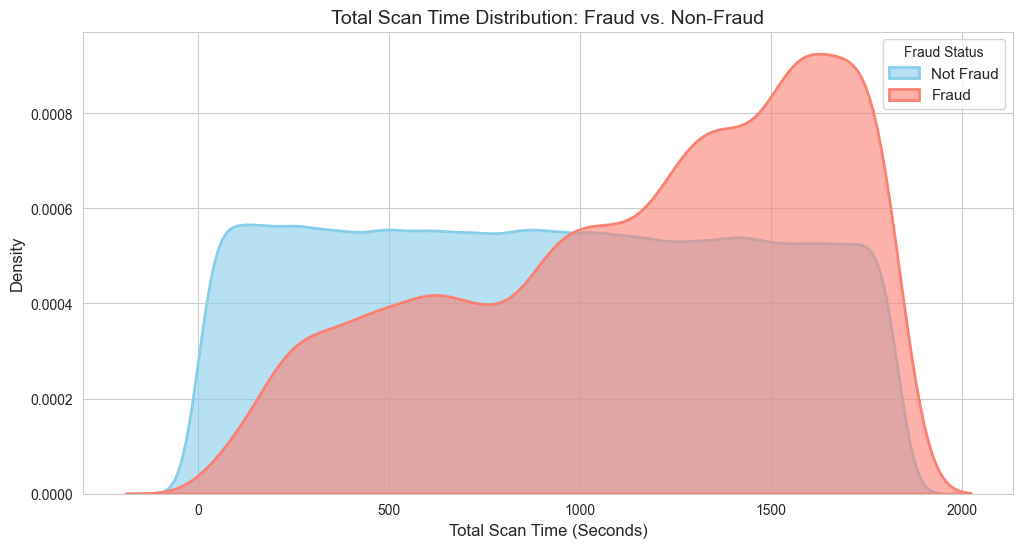

In [13]:
#create a stacked density plot for the 'totalScanTimeInSeconds' variable across the 'fraud' variable
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
sns.kdeplot(df.loc[df['fraud'] == 0, 'totalScanTimeInSeconds'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[df['fraud'] == 1, 'totalScanTimeInSeconds'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Total Scan Time (Seconds)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Total Scan Time Distribution: Fraud vs. Non-Fraud', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)

# Show plot
plt.show()

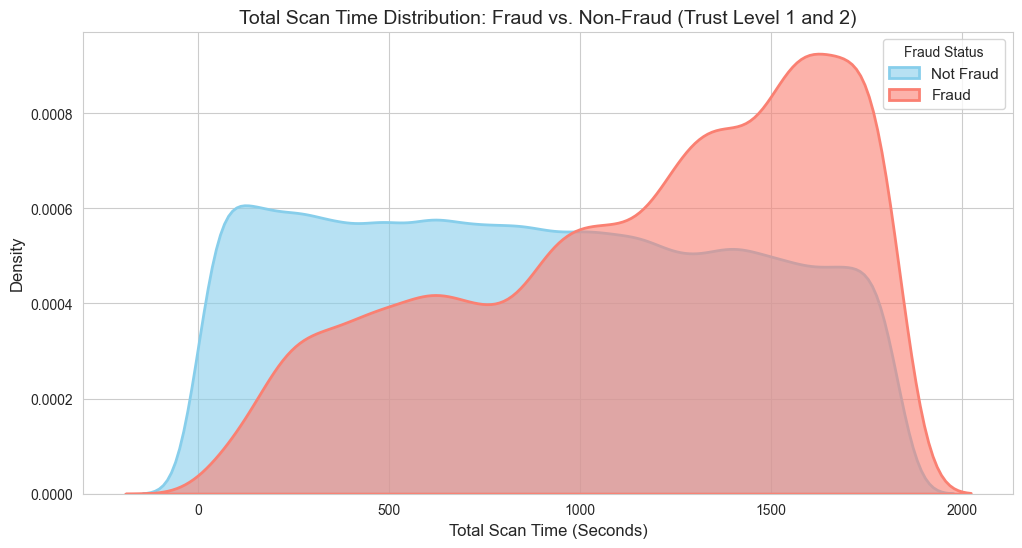

In [14]:
#create the same density plot for 'totalScanTimeInSeconds' variable across the 'fraud' variable when 'trustLevel' is only 1 and 2
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
#trustlevel 1 and 2
sns.kdeplot(df.loc[(df['fraud'] == 0) & (df['trustLevel'] <= 2), 'totalScanTimeInSeconds'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[(df['fraud'] == 1) & (df['trustLevel'] <= 2), 'totalScanTimeInSeconds'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Total Scan Time (Seconds)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Total Scan Time Distribution: Fraud vs. Non-Fraud (Trust Level 1 and 2)', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.show()

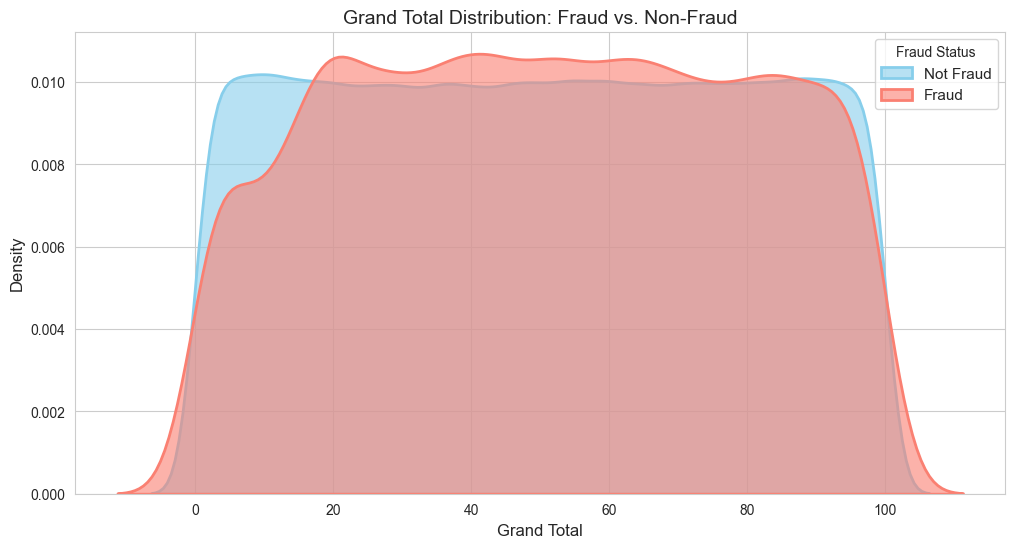

In [16]:
#create a stacked density plot for the 'grandTotal' variable across the 'fraud' variable
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
sns.kdeplot(df.loc[df['fraud'] == 0, 'grandTotal'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[df['fraud'] == 1, 'grandTotal'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Grand Total', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Grand Total Distribution: Fraud vs. Non-Fraud', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)

# Show plot
plt.show()

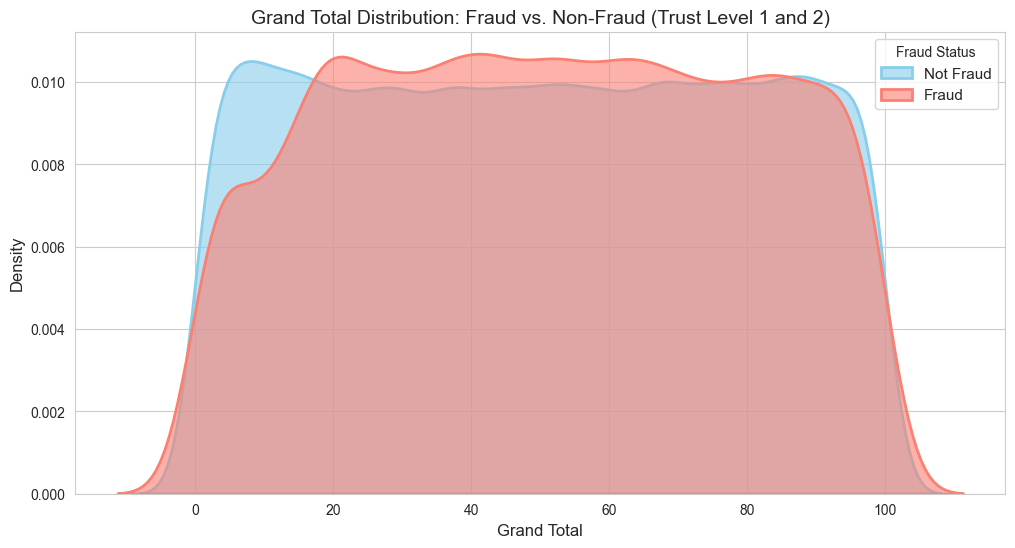

In [17]:
#create the same density plot for 'grandTotal' variable across the 'fraud' variable when 'trustLevel' is only 1 and 2
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
#trustlevel 1 and 2
sns.kdeplot(df.loc[(df['fraud'] == 0) & (df['trustLevel'] <= 2), 'grandTotal'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[(df['fraud'] == 1) & (df['trustLevel'] <= 2), 'grandTotal'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Grand Total', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Grand Total Distribution: Fraud vs. Non-Fraud (Trust Level 1 and 2)', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.show()

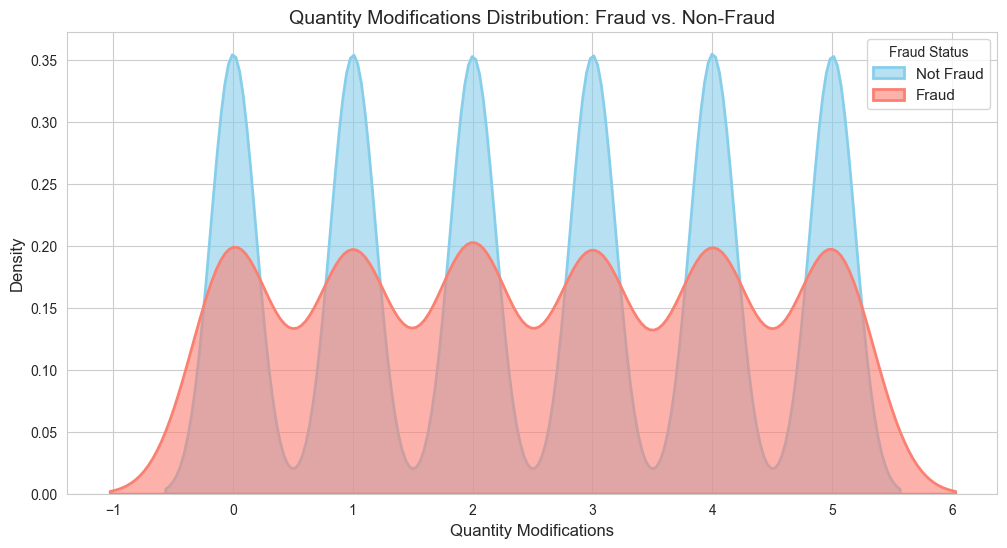

In [23]:
#create a stacked density plot for the 'quantitymodifications' variable across the 'fraud' variable
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
sns.kdeplot(df.loc[df['fraud'] == 0, 'quantityModifications'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1.5)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[df['fraud'] == 1, 'quantityModifications'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1.5)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Quantity Modifications', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Quantity Modifications Distribution: Fraud vs. Non-Fraud', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)

# Show plot
plt.show()

#quantity modification alone is not a good feature to distinguish between fraud and non-fraud